# Etapa 3: Análisis de supervivencia

In [1]:
# Montamos la unidad de Google Drive.
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/TFM

Mounted at /content/drive
/content/drive/MyDrive/TFM


In [2]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 8.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=b48df63f18f8d609a6b5bb883323312c7180d2f6ea70fbe79f5543ff19d12986
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [3]:
# Importamos módulos necesarios.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

from utils import read_data

# Aplicamos configuración sobre la visualización de los DataFrames.
pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_theme()

# Ruta de los archivos de origen.
input_path = 'data/processed/'

In [4]:
# Carga de todos los datos.
demographic = read_data(f'{input_path}demographic.csv')
diagnosis_prior = read_data(f'{input_path}diagnosis_prior.csv')
diagnosis_primary = read_data(f'{input_path}diagnosis_primary.csv')
diagnosis_other = read_data(f'{input_path}diagnosis_other.csv')
diagnosis_type = read_data(f'{input_path}diagnosis_type.csv')
treatment_ebrt = read_data(f'{input_path}treatment_ebrt.csv')
treatment_chemo = read_data(f'{input_path}treatment_chemo.csv')
treatment_type = read_data(f'{input_path}treatment_type.csv')
mutation_gene = read_data(f'{input_path}mutation_gene.csv')

Tiempo medio de supervivencia: 634 días



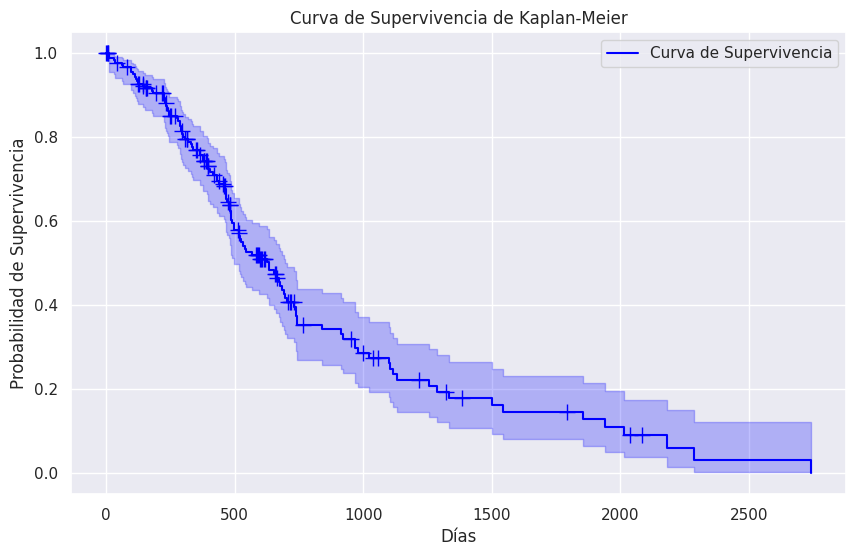

In [5]:
kmf = KaplanMeierFitter()

kmf.fit(demographic['Overall Survival'], event_observed=demographic['Vital Status'])

print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días\n')

plt.figure(figsize=(10, 6))

kmf.plot(label="Curva de Supervivencia", ci_show=True, color='blue', show_censors=True)

plt.title('Curva de Supervivencia de Kaplan-Meier')
plt.xlabel('Días')
plt.ylabel('Probabilidad de Supervivencia')
plt.show()

In [8]:
diagnosis_primary = diagnosis_primary.merge(demographic[['Patient Id', 'Overall Survival', 'Vital Status']], on='Patient Id', how='left')

Tiempo medio de supervivencia: 1103 días
Tiempo medio de supervivencia: 532 días
Tiempo medio de supervivencia: 541 días
Tiempo medio de supervivencia: inf días


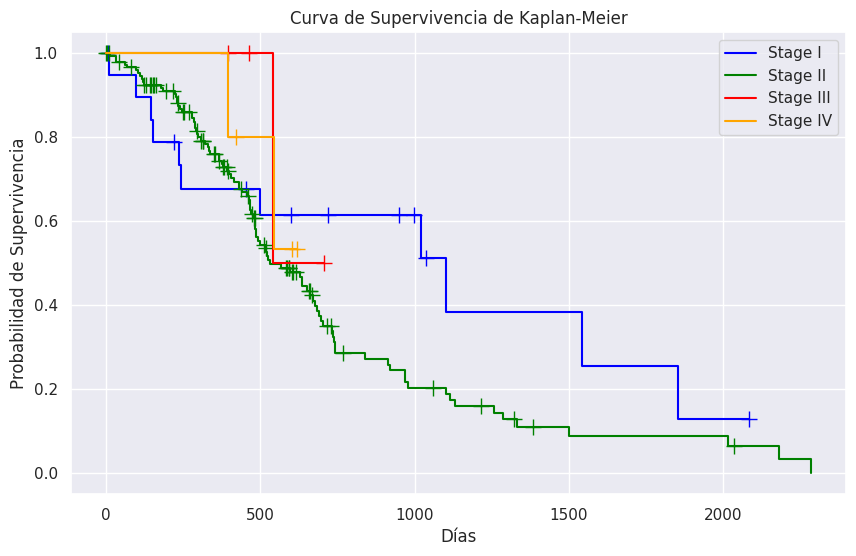

In [32]:
groups = diagnosis_primary['Ajcc Pathologic Stage']

Stage_I = (groups == 'Stage I')
Stage_II = (groups == 'Stage II')
Stage_III = (groups == 'Stage III')
Stage_IV = (groups == 'Stage IV')

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

kmf.fit(diagnosis_primary.loc[Stage_I, 'Overall Survival'], event_observed=diagnosis_primary.loc[Stage_I, 'Vital Status'])
kmf.plot(label="Stage I", ci_show=False, color='blue', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

kmf.fit(diagnosis_primary.loc[Stage_II, 'Overall Survival'], event_observed=diagnosis_primary.loc[Stage_II, 'Vital Status'])
kmf.plot(label="Stage II", ci_show=False, color='green', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

kmf.fit(diagnosis_primary.loc[Stage_III, 'Overall Survival'], event_observed=diagnosis_primary.loc[Stage_III, 'Vital Status'])
kmf.plot(label="Stage III", ci_show=False, color='red', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

kmf.fit(diagnosis_primary.loc[Stage_IV, 'Overall Survival'], event_observed=diagnosis_primary.loc[Stage_IV, 'Vital Status'])
kmf.plot(label="Stage IV", ci_show=False, color='orange', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

plt.title('Curva de Supervivencia de Kaplan-Meier')
plt.xlabel('Días')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.show()

Tiempo medio de supervivencia: 1103 días
Tiempo medio de supervivencia: 517 días
Tiempo medio de supervivencia: 627 días
Tiempo medio de supervivencia: inf días


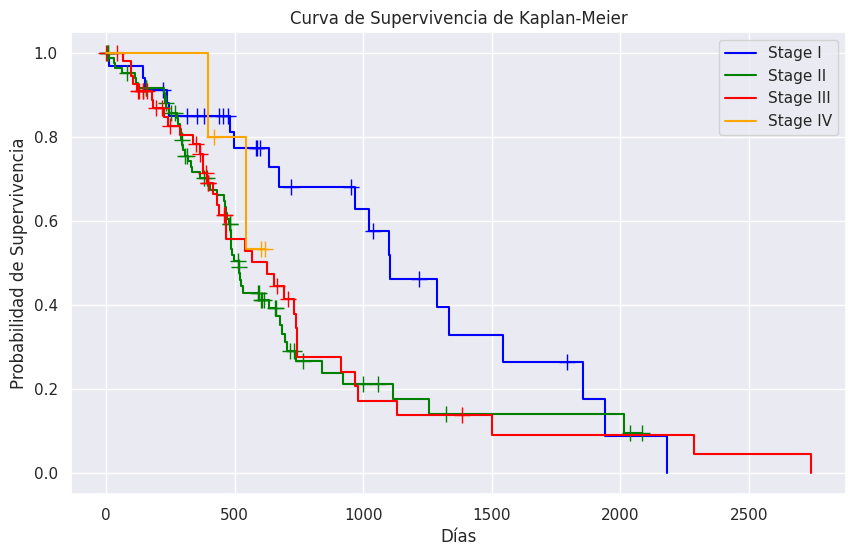

In [13]:
groups = diagnosis_primary['Ajcc Pathologic Stage 8th']

Stage_I = (groups == 'Stage I')
Stage_II = (groups == 'Stage II')
Stage_III = (groups == 'Stage III')
Stage_IV = (groups == 'Stage IV')

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

kmf.fit(demographic.loc[Stage_I, 'Overall Survival'], event_observed=demographic.loc[Stage_I, 'Vital Status'])
kmf.plot(label="Stage I", ci_show=False, color='blue', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

kmf.fit(demographic.loc[Stage_II, 'Overall Survival'], event_observed=demographic.loc[Stage_II, 'Vital Status'])
kmf.plot(label="Stage II", ci_show=False, color='green', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

kmf.fit(demographic.loc[Stage_III, 'Overall Survival'], event_observed=demographic.loc[Stage_III, 'Vital Status'])
kmf.plot(label="Stage III", ci_show=False, color='red', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

kmf.fit(demographic.loc[Stage_IV, 'Overall Survival'], event_observed=demographic.loc[Stage_IV, 'Vital Status'])
kmf.plot(label="Stage IV", ci_show=False, color='orange', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

plt.title('Curva de Supervivencia de Kaplan-Meier')
plt.xlabel('Días')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.show()

Tiempo medio de supervivencia: 517 días
Tiempo medio de supervivencia: 684 días


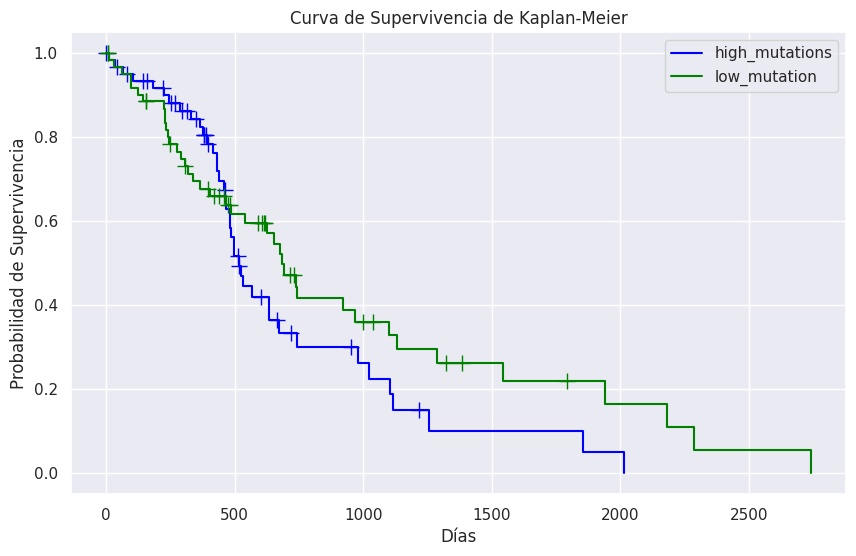

In [34]:
groups = diagnosis_primary['Gene Mutations']

high_mutations = (groups >= groups.median())
low_mutations = (groups < groups.median())

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

kmf.fit(diagnosis_primary.loc[high_mutations, 'Overall Survival'], event_observed=diagnosis_primary.loc[high_mutations, 'Vital Status'])
kmf.plot(label="high_mutations", ci_show=False, color='blue', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

kmf.fit(diagnosis_primary.loc[low_mutations, 'Overall Survival'], event_observed=diagnosis_primary.loc[low_mutations, 'Vital Status'])
kmf.plot(label="low_mutation", ci_show=False, color='green', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

plt.title('Curva de Supervivencia de Kaplan-Meier')
plt.xlabel('Días')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.show()

Tiempo medio de supervivencia: 1103 días
Tiempo medio de supervivencia: 568 días
Tiempo medio de supervivencia: 545 días


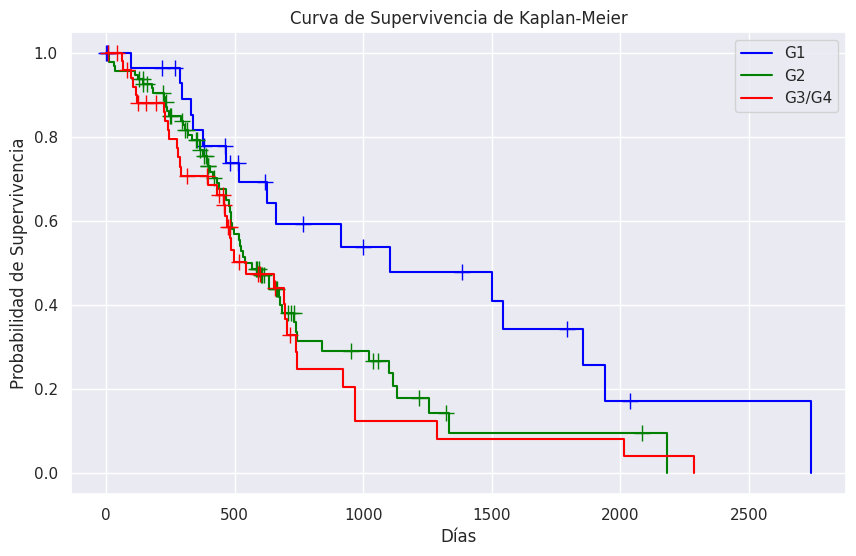

In [7]:
groups = diagnosis_primary['Tumor Grade']

g1 = (groups == 'G1')
g2 = (groups == 'G2')
g3_4 = (groups == 'G3') | (groups == 'G4')

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

kmf.fit(demographic.loc[g1, 'Overall Survival'], event_observed=demographic.loc[g1, 'Vital Status'])
kmf.plot(label="G1", ci_show=False, color='blue', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

kmf.fit(demographic.loc[g2, 'Overall Survival'], event_observed=demographic.loc[g2, 'Vital Status'])
kmf.plot(label="G2", ci_show=False, color='green', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

kmf.fit(demographic.loc[g3_4, 'Overall Survival'], event_observed=demographic.loc[g3_4, 'Vital Status'])
kmf.plot(label="G3/G4", ci_show=False, color='red', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

plt.title('Curva de Supervivencia de Kaplan-Meier')
plt.xlabel('Días')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.show()

Tiempo medio de supervivencia: 568 días
Tiempo medio de supervivencia: 1021 días


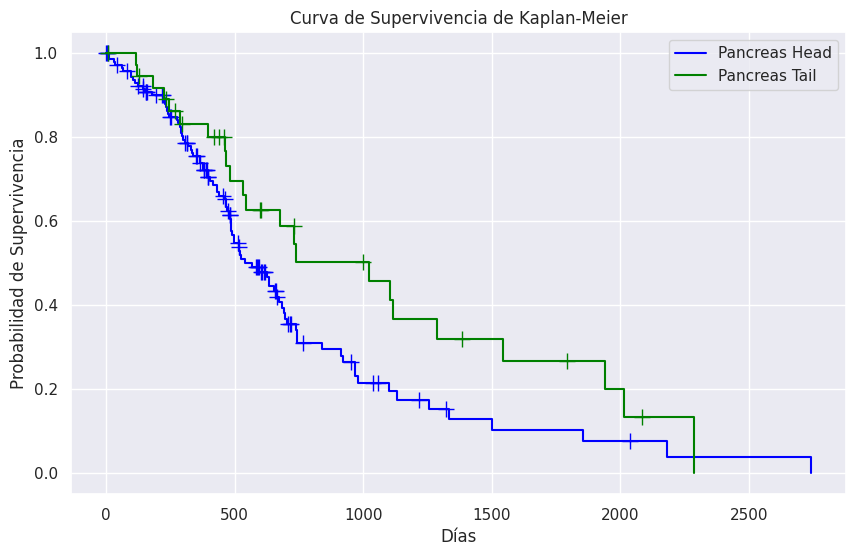

In [21]:
groups = diagnosis_primary['Sites Of Involvement']

head = (groups == 'Pancreas Head')

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

kmf.fit(demographic.loc[head, 'Overall Survival'], event_observed=demographic.loc[head, 'Vital Status'])
kmf.plot(label="Pancreas Head", ci_show=False, color='blue', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

kmf.fit(demographic.loc[~head, 'Overall Survival'], event_observed=demographic.loc[~head, 'Vital Status'])
kmf.plot(label="Pancreas Tail", ci_show=False, color='green', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

plt.title('Curva de Supervivencia de Kaplan-Meier')
plt.xlabel('Días')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.show()

R0: 111
R1/R2: 58
Tiempo medio de supervivencia: 676 días
Tiempo medio de supervivencia: 517 días


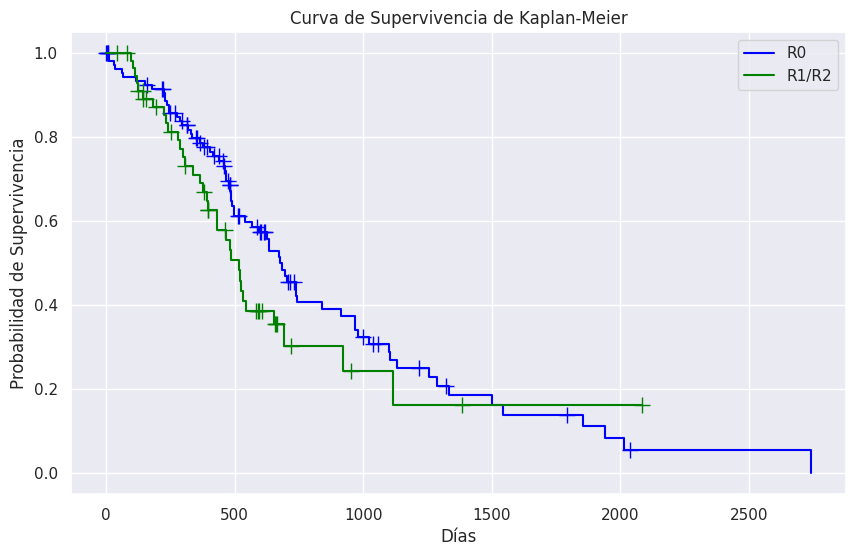

In [9]:
groups = diagnosis_primary['Residual Disease']

r0 = (groups == 'R0')
r1_2 = (groups == 'R1') | (groups == 'R2')

print(f'R0: {r0.sum()}')
print(f'R1/R2: {r1_2.sum()}')

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

kmf.fit(demographic.loc[r0, 'Overall Survival'], event_observed=demographic.loc[r0, 'Vital Status'])
kmf.plot(label="R0", ci_show=False, color='blue', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

kmf.fit(demographic.loc[r1_2, 'Overall Survival'], event_observed=demographic.loc[r1_2, 'Vital Status'])
kmf.plot(label="R1/R2", ci_show=False, color='green', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

plt.title('Curva de Supervivencia de Kaplan-Meier')
plt.xlabel('Días')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.show()

Tiempo medio de supervivencia: 518 días
Tiempo medio de supervivencia: 732 días


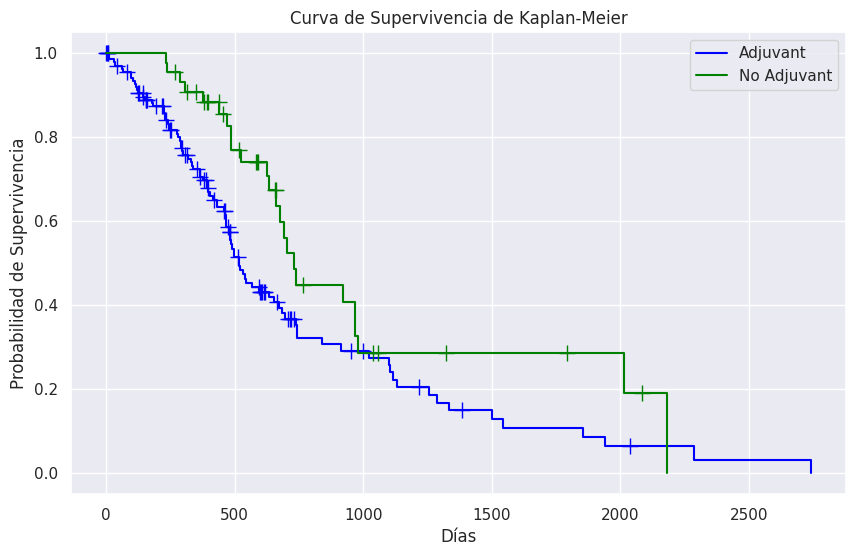

In [30]:
df = diagnosis_primary.merge(treatment_type[['Patient Id', 'Adjuvant']], on='Patient Id', how='left')

groups = df['Adjuvant']

no = (groups == 'No')

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

kmf.fit(demographic.loc[~no, 'Overall Survival'], event_observed=demographic.loc[~no, 'Vital Status'])
kmf.plot(label="Adjuvant", ci_show=False, color='blue', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

kmf.fit(demographic.loc[no, 'Overall Survival'], event_observed=demographic.loc[no, 'Vital Status'])
kmf.plot(label="No Adjuvant", ci_show=False, color='green', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

plt.title('Curva de Supervivencia de Kaplan-Meier')
plt.xlabel('Días')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.show()

Tiempo medio de supervivencia: 661 días
Tiempo medio de supervivencia: 541 días


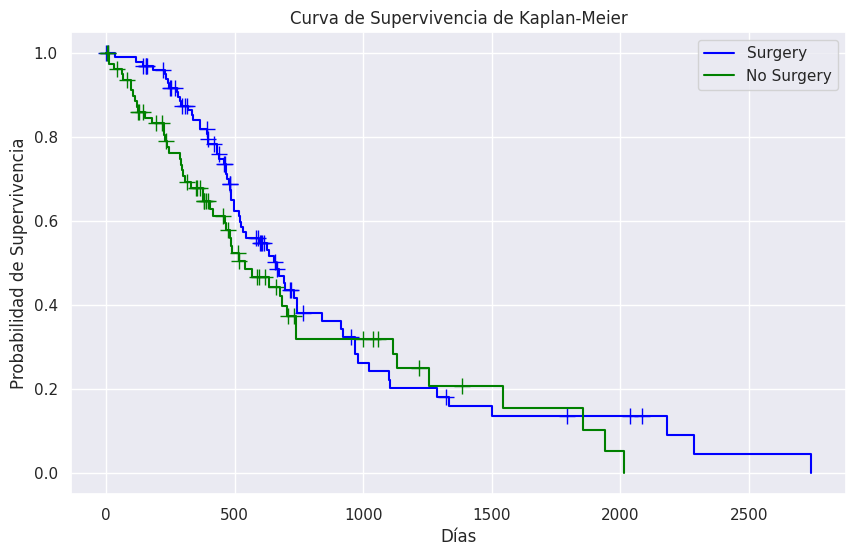

In [31]:
df = diagnosis_primary.merge(treatment_type[['Patient Id', 'Surgery']], on='Patient Id', how='left')

groups = df['Surgery']

yes = (groups == 'Yes')

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

kmf.fit(demographic.loc[yes, 'Overall Survival'], event_observed=demographic.loc[yes, 'Vital Status'])
kmf.plot(label="Surgery", ci_show=False, color='blue', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

kmf.fit(demographic.loc[~yes, 'Overall Survival'], event_observed=demographic.loc[~yes, 'Vital Status'])
kmf.plot(label="No Surgery", ci_show=False, color='green', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

plt.title('Curva de Supervivencia de Kaplan-Meier')
plt.xlabel('Días')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.show()

Tiempo medio de supervivencia: 541 días
Tiempo medio de supervivencia: 969 días


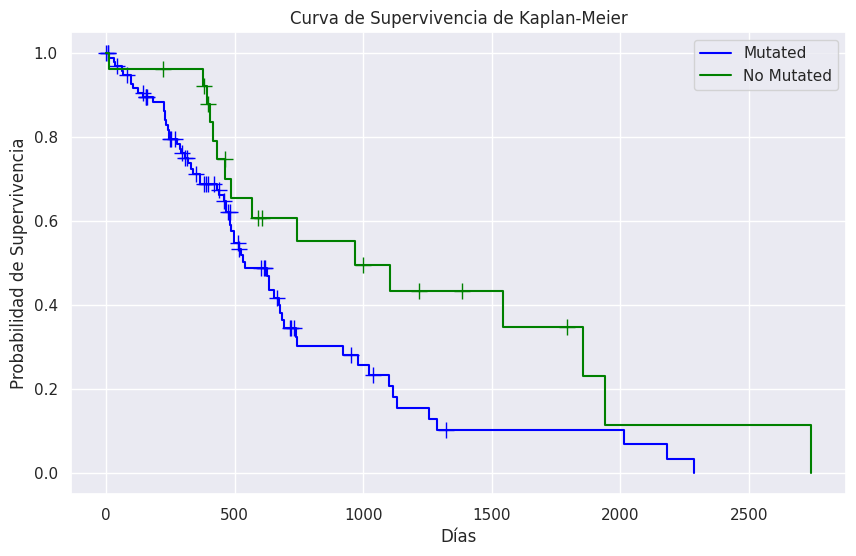

In [51]:
mutation_gene.loc[mutation_gene['Gene'] == 'KRAS'].transpose()

pd = diagnosis_primary.merge(mutation_gene.loc[mutation_gene['Gene'] == 'KRAS'].transpose(), left_on='Patient Id', right_index=True, how='left')

groups = pd[0]

mutated = (groups == 1)
no_mutated = (groups == 0)

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

kmf.fit(demographic.loc[mutated, 'Overall Survival'], event_observed=demographic.loc[mutated, 'Vital Status'])
kmf.plot(label="Mutated", ci_show=False, color='blue', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

kmf.fit(demographic.loc[no_mutated, 'Overall Survival'], event_observed=demographic.loc[no_mutated, 'Vital Status'])
kmf.plot(label="No Mutated", ci_show=False, color='green', show_censors=True)
print(f'Tiempo medio de supervivencia: {kmf.median_survival_time_:.0f} días')

plt.title('Curva de Supervivencia de Kaplan-Meier')
plt.xlabel('Días')
plt.ylabel('Probabilidad de Supervivencia')
plt.legend()
plt.show()